# Deep Convolutional Neural Network in Keras

In this notebook, we build a deep, convolutional, MNIST-classifying network inspired by [LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) and [this example code](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py).

#### Set seed for reproducibility

In [1]:
import numpy as np
np.random.seed(42)

#### Load dependencies

In [35]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D # new!
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import pyplot as plt

#### Load data

In [3]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
import pickle
X_train = pickle.load(open('../data/mnist/X_train.pkl', 'rb'))
y_train = pickle.load(open('../data/mnist/y_train.pkl', 'rb'))
X_test = pickle.load(open('../data/mnist/X_test.pkl', 'rb'))
y_test = pickle.load(open('../data/mnist/y_test.pkl', 'rb')) 

#### Preprocess data

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [5]:
X_train /= 255
X_test /= 255

In [6]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

#### Design neural network architecture

In [8]:
# CODE HERE
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
          
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

#### Configure model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train!

In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 196s - loss: 0.2427 - acc: 0.9262 - val_loss: 0.0515 - val_acc: 0.9838
Epoch 2/20
60000/60000 [==============================] - 197s - loss: 0.0856 - acc: 0.9742 - val_loss: 0.0414 - val_acc: 0.9855
Epoch 3/20
60000/60000 [==============================] - 193s - loss: 0.0630 - acc: 0.9809 - val_loss: 0.0382 - val_acc: 0.9872
Epoch 4/20
60000/60000 [==============================] - 196s - loss: 0.0519 - acc: 0.9836 - val_loss: 0.0290 - val_acc: 0.9904
Epoch 5/20
60000/60000 [==============================] - 193s - loss: 0.0440 - acc: 0.9860 - val_loss: 0.0299 - val_acc: 0.9916
Epoch 6/20
60000/60000 [==============================] - 196s - loss: 0.0380 - acc: 0.9878 - val_loss: 0.0277 - val_acc: 0.9913
Epoch 7/20
60000/60000 [==============================] - 196s - loss: 0.0332 - acc: 0.9895 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 8/20
60000/60000 [=======================

In [20]:
np.array([X_test[0]]).shape

(1, 28, 28, 1)

In [45]:
model.predict_classes(np.array([X_test[3]]))

1/1 [==============================] - 0s


array([0])

In [46]:
y_test[3]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

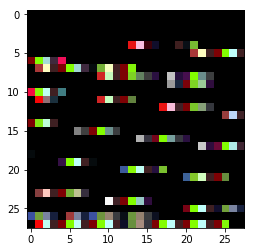

In [49]:
img = Image.fromarray(X_test[1], 'HSV')
plt.imshow(img)
plt.show()